In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# matplotlib 한글 
import platform
if platform.system() == 'Darwin' : 
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

In [3]:
data = pd.read_csv('../data/경기도/전처리 후/회귀df결측치포함.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준년월    343 non-null    object 
 1   시군명     343 non-null    object 
 2   총인구수    343 non-null    int64  
 3   신규가입자수  341 non-null    float64
 4   월별충전액   343 non-null    int64  
 5   월별사용액   343 non-null    int64  
 6   인센티브    343 non-null    float64
 7   월지급한도   343 non-null    int64  
 8   가맹점수    343 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 24.2+ KB


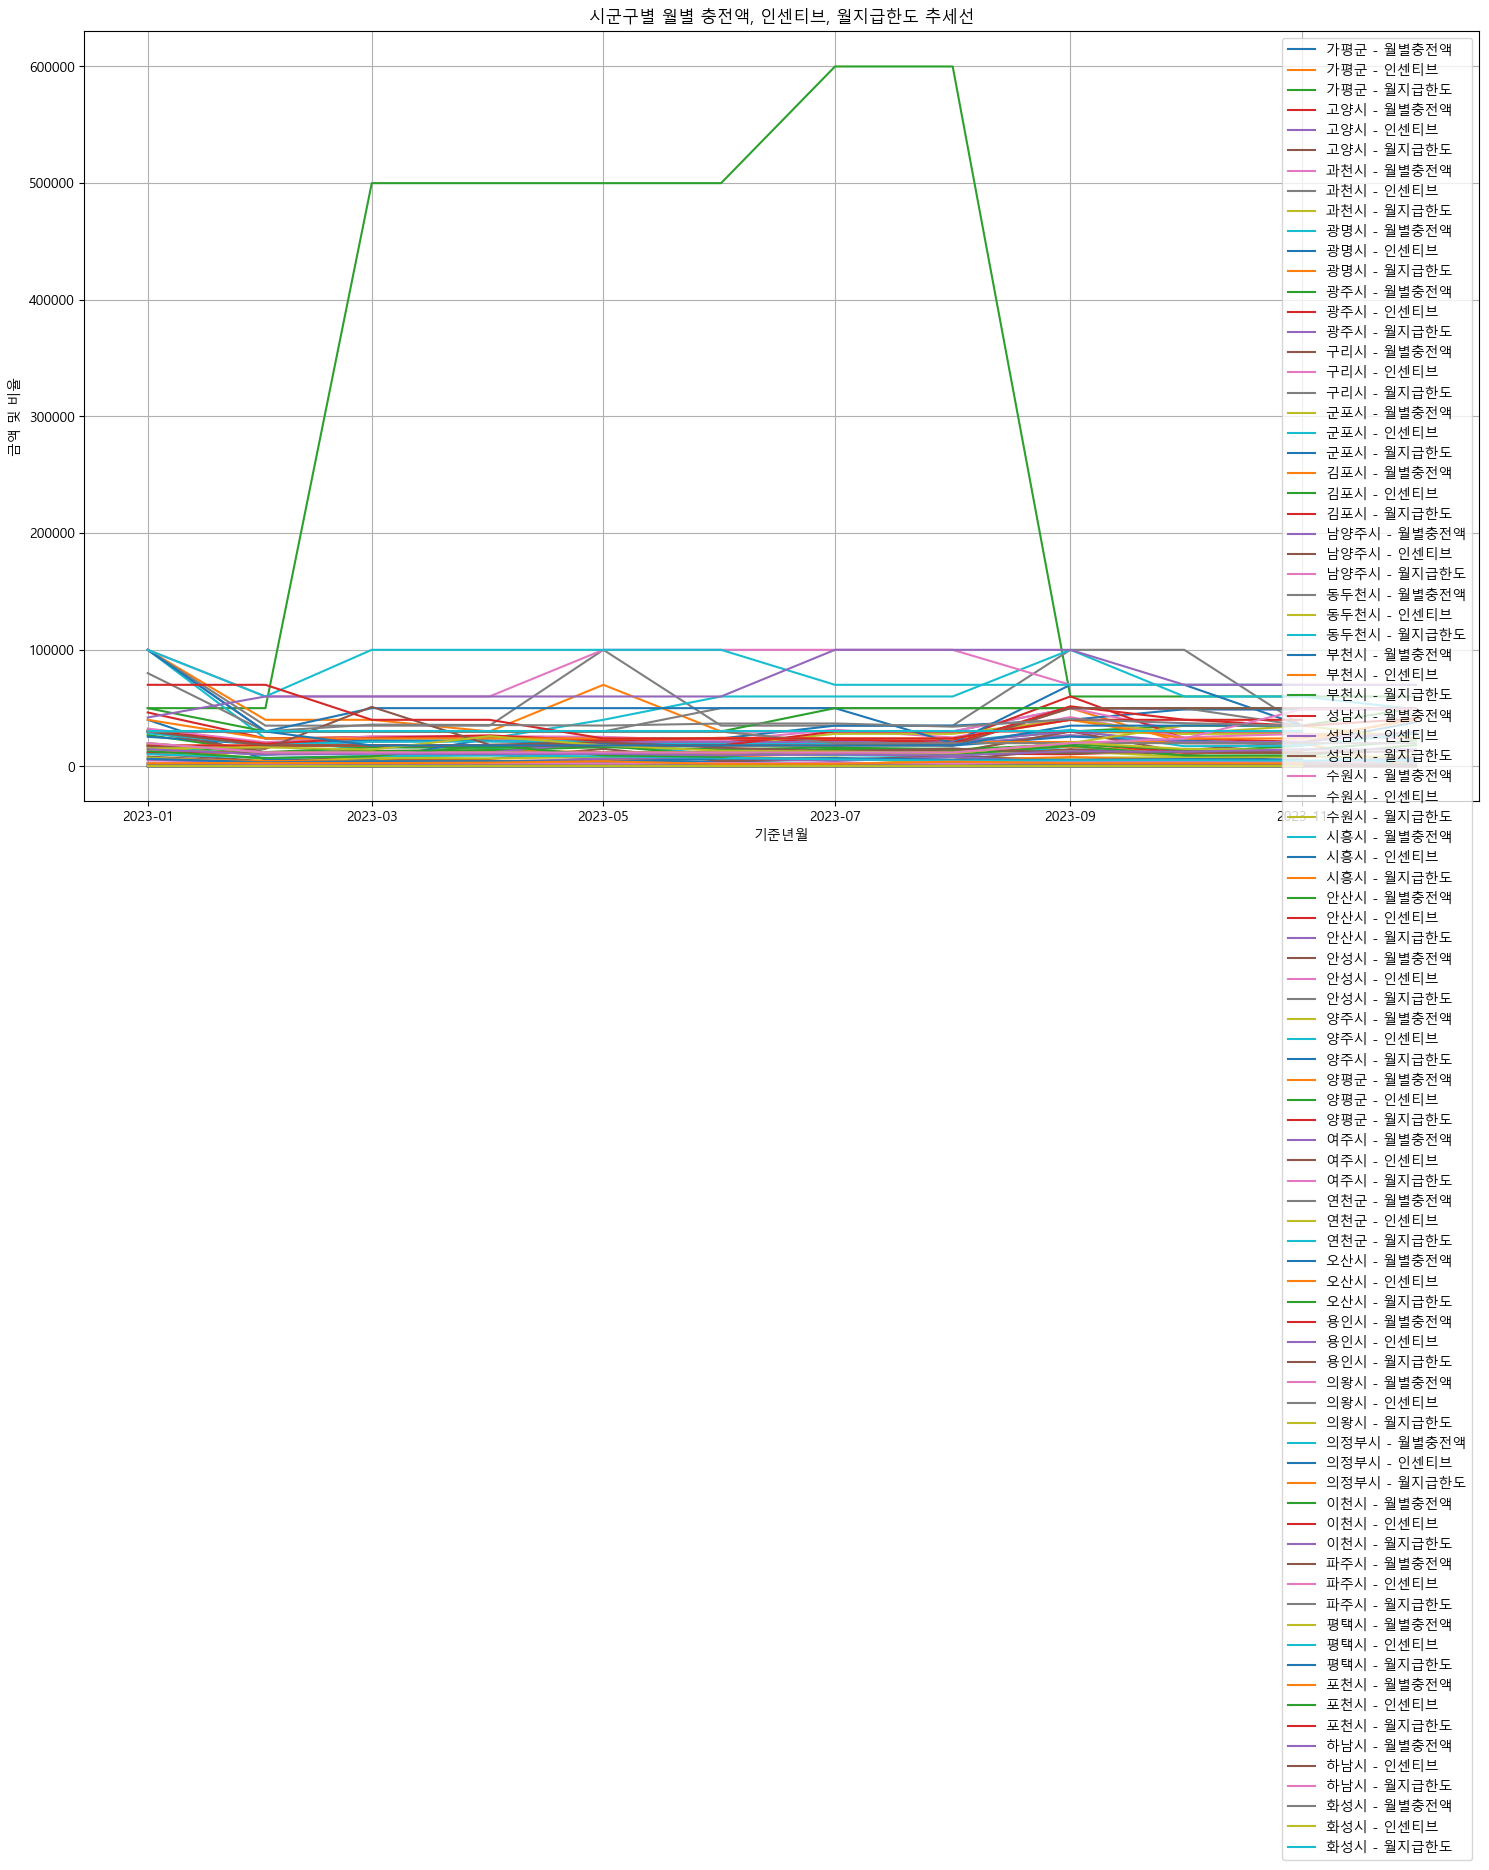

In [5]:
# '기준년월'을 datetime 객체로 변환
data['기준년월'] = pd.to_datetime(data['기준년월'])

# 결측치를 0으로 처리
data.fillna(0, inplace=True)

# 시군구별로 데이터를 그룹화
grouped = data.groupby('시군명')

# 시군구별 추세선을 그리기 위한 준비
plt.figure(figsize=(18, 10))

for name, group in grouped:
    plt.plot(group['기준년월'], group['월별충전액'], label=f'{name} - 월별충전액')
    plt.plot(group['기준년월'], group['인센티브'], label=f'{name} - 인센티브')
    plt.plot(group['기준년월'], group['월지급한도'], label=f'{name} - 월지급한도')

plt.title('시군구별 월별 충전액, 인센티브, 월지급한도 추세선')
plt.xlabel('기준년월')
plt.ylabel('금액 및 비율')
plt.legend()
plt.grid(True)
plt.show()

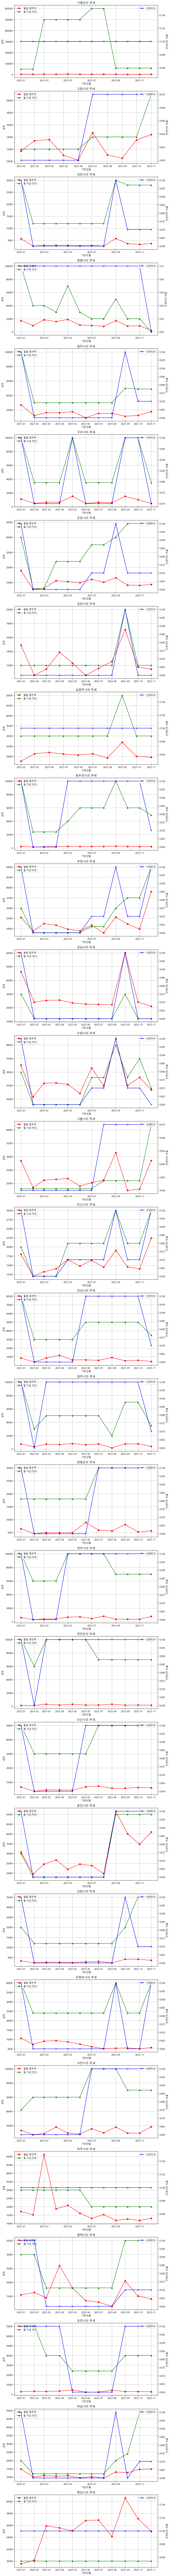

In [11]:
# 각 시군구별로 별도의 그래프 생성
unique_cities = data['시군명'].unique()
num_cities = len(unique_cities)
fig, axes = plt.subplots(num_cities, 1, figsize=(10, 5 * num_cities))

for i, city in enumerate(unique_cities):
    city_data = data[data['시군명'] == city]
    
    # 월별충전액과 월지급한도 그래프 (왼쪽 y축)
    ax = axes[i]
    ax.plot(city_data['기준년월'], city_data['월별충전액'], label='월별 충전액', marker='o', color='red')
    ax.plot(city_data['기준년월'], city_data['월지급한도'], label='월 지급 한도', marker='^', color='green')
    ax.set_title(f'{city}의 추세')
    ax.set_xlabel('기준년월')
    ax.set_ylabel('금액')
    ax.legend(loc='upper left')
    ax.grid(True)

    # 인센티브 그래프 (오른쪽 y축)
    ax_right = ax.twinx()
    ax_right.plot(city_data['기준년월'], city_data['인센티브'], label='인센티브', marker='x', color='blue')
    ax_right.set_ylabel('인센티브 비율')
    ax_right.legend(loc='upper right')

plt.tight_layout()
plt.show()